# Montecarlo Simulation of a portfolio

This is a small case study I did to challenge myself during freetime, to keep my computing skills up and store in my mind the theoretical concepts I learn everyday. A lot to learn and in many aspects but it would be stupid not to try and waiting to be perfect due to the fear of failure. I put this in my portfolio to track my progess as well as I still don't study this in class so I don't have any landmark except my work. Feel free to give me anything valuable(advice, tips, even cheers), I would be happy to learn something from you. Nice reading.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import yfinance as yf

A man contacts the firm to invest his money. In addition to our responsability in managing his portfolio, we are in charge of suggesting him a road map in his new investor career. Let's suggest to him investing following the Swensen Model, which is an exemple of successful investment roadmap.
(http://www.lazyportfolioetf.com/allocation/david-swensen-yale-endowment/)

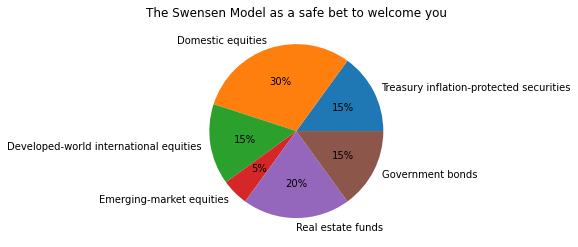

In [10]:
pct = [15,30,15,5,20,15]
labels = ["Treasury inflation-protected securities", "Domestic equities", "Developed-world international equities",
          "Emerging-market equities","Real estate funds","Government bonds"]

plt.pie(pct, labels = labels, autopct='%.0f%%')
plt.title("The Swensen Model as a safe bet to welcome you")
plt.show()

### Portfolio Creation:

We choose some diverse assets and we take a look a their evolution since the beginning of the year:

In [12]:
today=datetime.today().strftime("%Y-%m-%d")
stock = ["JPM", "AAPL", "ARE", "WFC", "LOW", "LNC"]
data = []
for ticker in stock:
    price= yf.download(ticker, start="2021-01-01", end = today)
    data.append(price["Adj Close"])
data= pd.concat(data, axis=1)
data.columns=stock
data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,JPM,AAPL,ARE,WFC,LOW,LNC
Date,,,,,,
2020-12-31,123.957153,131.877014,174.966995,29.774254,158.243134,48.937069
2021-01-04,122.786545,128.617096,167.652985,29.300709,158.114990,47.487732
2021-01-05,123.454666,130.207306,167.476257,30.119549,158.647354,47.769817
2021-01-06,129.251572,125.824318,160.270233,32.250511,160.766983,51.135395
2021-01-07,133.496094,130.117859,162.322083,32.980560,161.397964,51.193760
...,...,...,...,...,...,...
2021-11-10,167.619995,147.919998,205.419998,50.360001,232.550003,72.029999
2021-11-11,167.610001,147.869995,205.580002,50.590000,232.320007,73.290001
2021-11-12,166.860001,149.990005,205.550003,50.959999,236.320007,73.709999


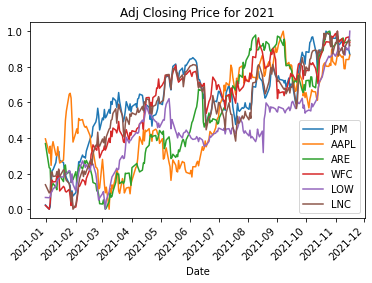

In [13]:
data_norm = (data-data.min())/ (data.max() - data.min())
for column in data_norm.columns:
    data_norm[column].plot()
plt.title('Adj Closing Price for 2021')
plt.xticks(rotation=45)
plt.legend(data_norm.columns)

The portfolio seems acceptable, so we take those assets and start deeging deeper.

In [25]:
cum_returns=(data.pct_change()+1).cumprod()
cum_returns

,JPM,AAPL,ARE,WFC,LOW,LNC
Date,,,,,,
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,0.990556,0.975281,0.958198,0.984095,0.999190,0.970384
2021-01-05,0.995946,0.987339,0.957188,1.011597,1.002554,0.976148
2021-01-06,1.042712,0.954103,0.916003,1.083168,1.015949,1.044921
2021-01-07,1.076954,0.986661,0.927730,1.107687,1.019937,1.046114
...,...,...,...,...,...,...
2021-11-10,1.352241,1.121651,1.174050,1.691394,1.469574,1.471890
2021-11-11,1.352161,1.121272,1.174964,1.699119,1.468121,1.497638
2021-11-12,1.346110,1.137348,1.174793,1.711546,1.493398,1.506220


(array([18628., 18659., 18687., 18718., 18748., 18779., 18809., 18840.,
        18871., 18901., 18932., 18962.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

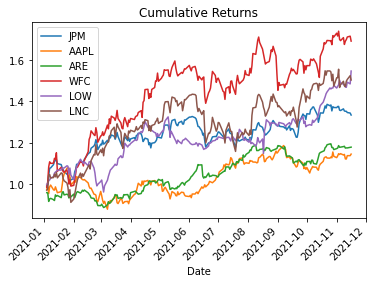

In [26]:
for column in cum_returns.columns:
    cum_returns[column].plot()
plt.title('Cumulative Returns')
plt.legend(data_norm.columns)
plt.xticks(rotation=45)

The Returns seems acceptable as well for a beginning, the customer is satisfied of the plan and we agree on a management that would give us a 4% return over the next year.

We define a function that create a porftolio given the Ticker choosen by the user, I choosed here to compute daily returns(for monthly or annual returns, user can just multiply by respectively 21 or 252 the covMatrix in the penultimate line of the function).

In [32]:
def portfolio(stocks, start, end):
    data=yf.download(stocks, start=start, end=end)
    returns = data["Adj Close"].pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix


In [33]:
meanReturns, covMatrix = portfolio(stocks=stock, start="2021-01-01", end=today)

weights = pct
weights /= np.sum(weights)

[*********************100%***********************]  6 of 6 completed


### Risk Managment: the MonteCarlo Simulation

In [37]:
nb_sims = 10000
T = 365 #timeframe in days

meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, nb_sims), fill_value=0.0)

initialPortfolio = 100000

for m in range(0, nb_sims):
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(L, Z) 
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio



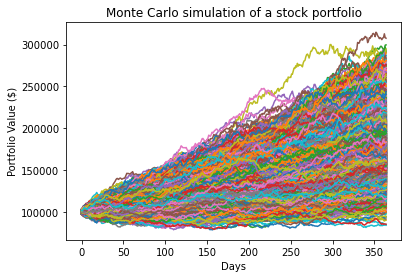

In [38]:
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('Monte Carlo simulation of a stock portfolio')
plt.show()


Suppose the goal we plan to agree on with the portfolio owner is a minimum return of 4% after 1 year, what is the probability the outcome will not match the growth expectations ?

In [39]:
Loss = portfolio_sims[364]<initialPortfolio*1.04
nb_losses=len(portfolio_sims[364][Loss==True])
failure_rate=(nb_losses/nb_sims)*100
print("The probability we will not attain the goal we plan to agree on with the portfolio owner is {}%".format(np.round(failure_rate,2)))

The probability we will not attain the goal we plan to agree on with the portfolio owner is 0.29%
